# Object detection
## Face detection using Haar Cascades
### Theory
Haar feature-based cascade classifiers is a machine learning based approach where a cascade function is trained from a lot of positive and negative images.  
The algorithm needs a lot of positive images (images of faces) and negative images (images without faces) to train the classifier. Haar features are like convolutional kernel. Each feature is a single value obtained by subtracting sum of pixels under the white rectangle from sum of pixels under the black rectangle.  
To calculate lots of features efficiently, integral image is introduced. Most of calculated features are irrelevant. Adaboost is used to select better features. Adaboost finds the best threshold which classifies the faces to positive and negative. Final classifier is a weighted sum of these weak classifiers.  
When detecting, algorithm applies 6000 features to each 24x24 window in an image. To compute it efficiently, the features are grouped into different stages of classifiers and applied one-by-one. If a window fails the first stage, discard it. The window which passes all stages is a face region.
### Haar-cascade Detection in OpenCV
OpenCV provides a training method and pretrained models. Here we use pretrained models.

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

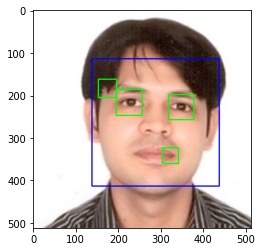

In [8]:
face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('data/haarcascade_eye.xml')

img = cv2.imread('inputs/sachin.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for(x, y, w, h) in faces:
    img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()